# **Inferencia estadística**
#IE13. Ejercicios y desafíos adicionales

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="100" align="left" title="Runa-perth">
<br clear="left">
Contenido opcional


## <font color='blue'>**Pruebas de Hipótesis para más de 2 muestras**</font>

## <font color='blue'>**Introducción**</font>

Cuando se trata de datos que se le presentan en diferentes grupos o subpoblaciones, es posible que le interese saber si proceden de la misma población o si representan poblaciones diferentes (con parámetros diferentes).

![Matriz Covarianza](https://drive.google.com/uc?export=view&id=1sfSZFigycClnPccoc0go808zsELvP8IZ)

Como puede ver, hay tres grupos diferentes. Ahora la pregunta es: ¿esos tres grupos pertenecen a la misma especie de animales? Bueno, podemos adivinar que dos de ellos (naranja y negro) realmente lo hacen, ya que pertenecen a pájaros, mientras que el tercero (en azul) es más probable que pertenezca a un perro.

Una respuesta a este problema es para qué está destinado el análisis (One-way) ANalysis Of VAriance. Básicamente, descompone las varianzas dentro de cada grupo y entre grupos, basándose en la Hipótesis Nula de que los grupos / muestras se han extraído de la misma población, por lo que sus medias son equivalentes.


## <font color='blue'>**Ejemplo a trabajar**</font>

Como caso de estudio, imagine a un grupo de estudiantes de diferentes universidades que toman el mismo examen. Desea ver si una universidad supera a la otra, por lo que su hipótesis nula es que las medias de los GPA en cada grupo son equivalentes a las de los otros grupos. Para simplificar, consideraremos 3 grupos (universidad "A", "B", "C") con 6 estudiantes cada uno.

Los supuestos necesarios:
1. Los valores de las variables de respuesta están distribuidos normalmente (o aproximadamente distribuidos normalmente)
2. Las varianzas de muestras son iguales
3. Los valores  para un grupo dado son: variables aleatorias normales independientes e idénticamente distribuidas

In [1]:
import pandas as pd
a = [25, 25, 27, 30, 23, 20]
b = [30, 30, 21, 24, 26, 28]
c = [18, 30, 29, 29, 24, 26]
list_of_tuples = list(zip(a, b, c))
df = pd.DataFrame(list_of_tuples, columns = ['A', 'B', 'C'])
df

,A,B,C
0,25,30,18
1,25,30,30
2,27,21,29
3,30,24,29
4,23,26,24
5,20,28,26


### <font color='green'>Actividad 1</font>

**Calculando el promedio de cada muestra**

Calcule el promedio de cada una de las muestras y almacenelas respectivamente en m1, m2 y m3.


$$ \overline{Y_1} = \frac{1}{6} \sum Y_{1i}$$
$$ \overline{Y_2} = \frac{1}{6} \sum Y_{2i}$$
$$ \overline{Y_3} = \frac{1}{6} \sum Y_{3i}$$

In [5]:
import numpy as np

m1 = np.mean(a)
m2 = np.mean(b)
m3 = np.mean(c)

<font color='green'>Fin Actividad 1</font>

**Calculemos el promedio total**

$$ \overline{Y} = \frac{\sum_i \overline{Y_i}}{k}$$

In [6]:
m = (m1 + m2 + m3) / 3
print('Promedio total: {}'.format(m))

Promedio total: 25.833333333333332


### <font color='green'>Actividad 2</font>
Calcule la varianza del grupo sobre el total $SS_B$, de acuerdo a la siguiente formula.

$$SS_B = n(\overline{Y_1} - \overline{Y})^2 + n(\overline{Y_2} - \overline{Y})^2 + n(\overline{Y_3} - \overline{Y})^2$$

Asumiento que $\overline{Y_1}$ y $SS_B$  es dado, la ecuacion anterior tiene dos grados de libertad.

Almacene el valor en la variable SSb.



In [9]:
n = 6
SSb = n*(m1-m)**2 + n*(m2-m)**2 + n*(m3-m)**2

<font color='green'>Fin Actividad 2</font>

### <font color='blue'>**Normalicemos por los grados de libertad**</font>


$$ MS_B = \frac{SS_B}{df}$$


In [10]:
MSb = SSb / 2
print('Valor cuadrático medio entre grupos: {}'.format(MSb))


Valor cuadrático medio entre grupos: 3.4999999999999996


### <font color='blue'>**Calculemos la suma cuadratica dentro del grupo**</font>

$$SS_W = \sum_i\sum_j (Y_{ij}-\overline{Y}_j)^2$$

In [11]:
err_a = list(a - m1)
err_b = list(b - m2)
err_c = list(c - m3)
err = err_a + err_b + err_c
ssw = []
for i in err:
    ssw.append(i**2)
SSw=np.sum(ssw)
print('Suma de diferencias cuadradas dentro del grupo: {}'.format(SSw))

Suma de diferencias cuadradas dentro del grupo: 223.5


### <font color='blue'>**Normalicemos por el grado de libertad. k(n-1)**</font>

$$MS_W = \frac{SS_W}{df}$$



In [12]:
MSw = SSw / 15
print('Valor cuadrático medio dentro del grupo: {}'.format(MSw))

Valor cuadrático medio dentro del grupo: 14.9


### <font color='blue'>**Calcule el F-Score**</font>

$$F = \frac{MS_B}{MS_W}$$

In [13]:
F = MSb / MSw
print('F-score: {}'.format(F))

F-score: 0.23489932885906037


In [14]:
import scipy.stats as stats
stats.f_oneway(a, b, c)


F_onewayResult(statistic=0.2348993288590604, pvalue=0.793504662732833)

### <font color='blue'>**La distribucion de Fisher**</font>

Las siguientes son algunas de las aplicaciones importantes donde la distribución muestral de la estadística respectiva bajo H0 es la distribución F.

1. Probar la igualdad de varianzas de dos poblaciones normales.

2. Probar la igualdad de medias de k (> 2) poblaciones normales.

3. Realización de análisis de varianza para datos clasificados bidireccionales.


Si los supuestos descritos al inicio de este notebook son ciertos, la relación MSb/MSw se comporta como una [distribución de Fisher](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html#scipy.stats.f) con (2,15) grados de libertad.

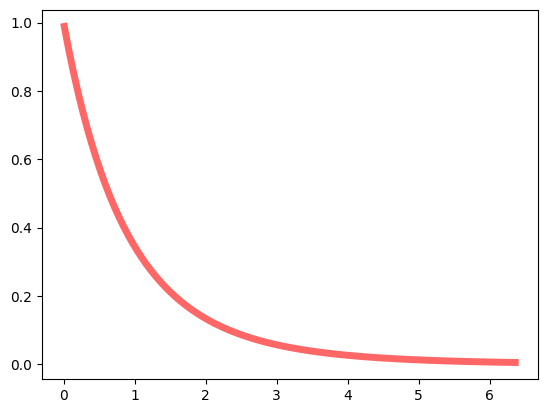

In [15]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,15
x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')

In [16]:
print(x )
print(f.pdf(x, dfn, dfd))

[0.01005707 0.07418653 0.13831599 0.20244545 0.26657491 0.33070437
 0.39483382 0.45896328 0.52309274 0.5872222  0.65135166 0.71548112
 0.77961058 0.84374004 0.90786949 0.97199895 1.03612841 1.10025787
 1.16438733 1.22851679 1.29264625 1.3567757  1.42090516 1.48503462
 1.54916408 1.61329354 1.677423   1.74155246 1.80568192 1.86981137
 1.93394083 1.99807029 2.06219975 2.12632921 2.19045867 2.25458813
 2.31871758 2.38284704 2.4469765  2.51110596 2.57523542 2.63936488
 2.70349434 2.7676238  2.83175325 2.89588271 2.96001217 3.02414163
 3.08827109 3.15240055 3.21653001 3.28065946 3.34478892 3.40891838
 3.47304784 3.5371773  3.60130676 3.66543622 3.72956568 3.79369513
 3.85782459 3.92195405 3.98608351 4.05021297 4.11434243 4.17847189
 4.24260134 4.3067308  4.37086026 4.43498972 4.49911918 4.56324864
 4.6273781  4.69150756 4.75563701 4.81976647 4.88389593 4.94802539
 5.01215485 5.07628431 5.14041377 5.20454322 5.26867268 5.33280214
 5.3969316  5.46106106 5.52519052 5.58931998 5.65344944 5.7175

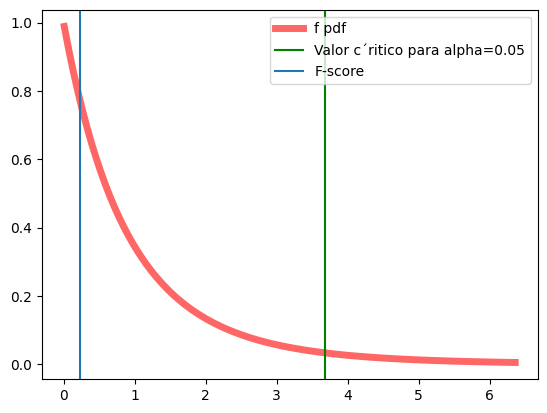

In [17]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,15
x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')
plt.axvline(x=3.68, label='Valor c´ritico para alpha=0.05', color='g')
plt.axvline(x=F, label='F-score')
plt.legend()

No rechazamos la hipótesis nula sobre la igualdad entre medias. Podemos concluir (con un error del 5%, o alternativamente, con una confianza del 95%) que no existe una diferencia significativa entre nuestras tres universidades A, B y C.

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="50" align="left" title="Runa-perth">
<br clear="left">